## Imports

In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import seaborn as sns 
import matplotlib.pyplot as plt

dataset = pd.read_csv("spam.csv")
dataset

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Splitting into x and y vectors

In [92]:
# independent variable
email = dataset.iloc[:,1]
# dependent variable
label = dataset.iloc[:,0]

## Converting labels to numeric values

In [93]:
cv = CountVectorizer() 
email = cv.fit_transform(email)

## Splitting training and testing sets

In [94]:
# training 80% and testing 20 %
x_train, x_test, y_train, y_test = train_test_split(email, label, test_size = 0.2, random_state = 0)

## Creating the model

In [95]:
model = SVC(random_state=0, kernel = "rbf")

## Training the model

In [96]:
model.fit(x_train,y_train)

SVC(random_state=0)

## Prediction Accuracy score

In [97]:
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9757847533632287

## Confusion Matrix

In [98]:
confusion_matrix(y_test,y_predict)

array([[949,   0],
       [ 27, 139]])

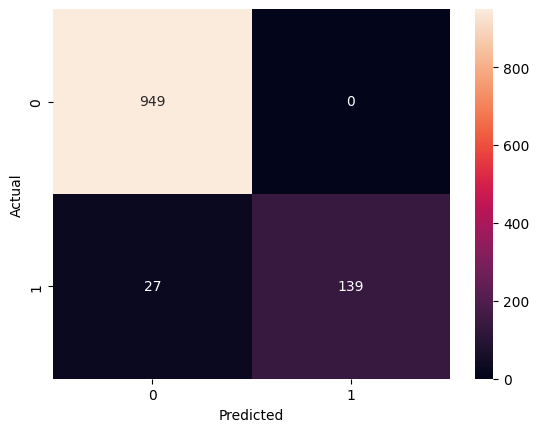

In [99]:
# annot will display the values in the heat map
# formatting will format the data values displayed in annot
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True, fmt="g") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

## Classification Report

In [100]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       949
        spam       1.00      0.84      0.91       166

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.97      1115



## Predict the given data

In [109]:
emails = [  "Hey, you have won a car !!!!. Conrgratzz", 
            "Dear applicant, Your CV has been recieved. Best regards", 
            "You have received $1000000 to your account", 
            "Join with our whatsapp group", 
            "Kindy check the previous email.Kind Regards"]

# get word counts
emailCv = cv.transform(emails)

# predicting whether they are spam / ham
predicted_labels = model.predict(emailCv)

# adding those data to a dataframe
df = pd.DataFrame(list(zip(emails, predicted_labels)), columns=['Emails','Label'])
df

,Emails,Label
0,"Hey, you have won a car !!!!. Conrgratzz",ham
1,"Dear applicant, Your CV has been recieved. Bes...",ham
2,You have received $1000000 to your account,ham
3,Join with our whatsapp group,ham
4,Kindy check the previous email.Kind Regards,ham
